In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## Task 1: K-Means
Implement k-Means from scratch with the euclidean distance.
Complete the functions recompute_centroids, recompute_assigments and k_means.
Implement early stopping when the algorithm has converged to a solution.
Use the numpy arrays in the code to represent the cluster assigments and centroids.

Converged after 11 iterations.


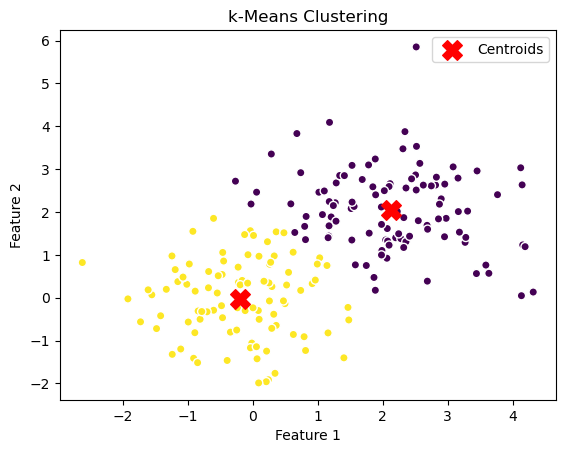

In [21]:
def k_means(X, k, centroids,n_iter=100):
    labels = np.zeros(X.shape[0])
    for i in range(n_iter):
        old_centroids = centroids.copy()

        # Recompute assignments
        labels = recompute_assignments(X, k, centroids)

        # Recompute centroids
        centroids = recompute_centroids(X, k, labels)

        # Check for convergence
        if np.linalg.norm(centroids - old_centroids) < 1e-4:
            print(f"Converged after {i+1} iterations.")
            break
    return labels, centroids

def recompute_centroids(X, k, labels):
    centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])
    return centroids

    return centroids

def recompute_assignments(X, k, centroids):
    distances = np.linalg.norm(X[:, np.newaxis, :] - centroids, axis=2)
    labels = np.argmin(distances, axis=1)
    return labels

# generate test set of two gaussian clusters
np.random.seed(42)
X1 = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], 100)
X2 = np.random.multivariate_normal([2, 2], [[1, 0], [0, 1]], 100)
X = np.vstack((X1, X2))

# run k-means
k = 2
# take random centroids from data
centroids = X[np.random.choice(X.shape[0], k, replace=False), :]
labels, centroids = k_means(X, k, centroids)

# plot results here
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', edgecolors='w')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('k-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

## K-Medians
Now implement K-medians. Here, the centroids are made up of the median of each dimension instead of the average.
Compute the respective within cluster variations for k-means and k-medians and compare them.
Does a better objective also result in a subjectively better clustering?

Converged after 5 iterations.


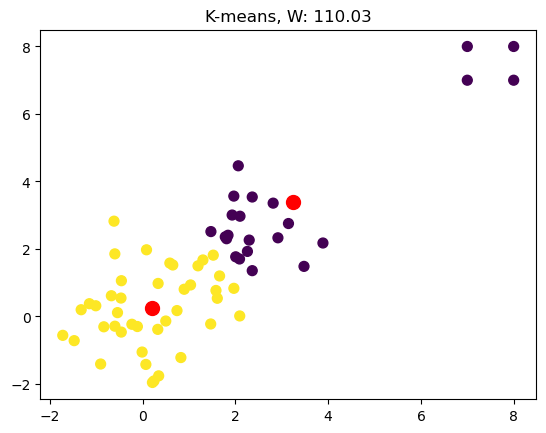

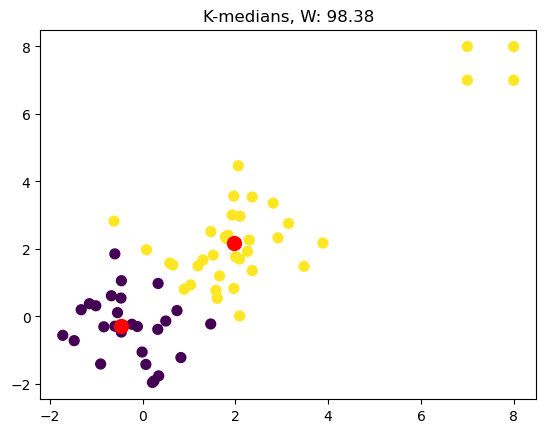

In [22]:
def k_medians(X, k, medians,n_iter=100):
    labels = np.zeros(X.shape[0])
    for i in range(n_iter):
        # Recompute assignments
        labels = recompute_assignments(X, k, medians)

        # Recompute medians
        medians = recompute_medians(X, k, labels)

    return labels, medians

def recompute_medians(X, k, labels):
    medians = np.array([np.median(X[labels == j], axis=0) for j in range(k)])
    return medians

def compute_within_cluster_variation(X, labels, centroids):
    k = len(centroids)
    within_cluster_variation = 0
    for i in range(k):
        cluster_points = X[labels == i]
        within_cluster_variation += np.sum(np.linalg.norm(cluster_points - centroids[i], axis=1))
    return within_cluster_variation

# generate test set of two gaussian clusters add noise on 
np.random.seed(42)
X1 = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], 30)
X2 = np.random.multivariate_normal([2, 2], [[1, 0], [0, 1]], 30)
noise = np.array([[8,8],[8,7],[7,8],[7,7]])
X = np.vstack((X1, X2, noise))

# run k-means
k = 2
centroids = X[np.random.choice(X.shape[0], k, replace=False), :]
labels, centroids = k_means(X, k, centroids)
in_cluster_variation_kmeans = compute_within_cluster_variation(X, labels, centroids)

# plot results
plt.figure()
plt.title('K-means, W: {:.2f}'.format(in_cluster_variation_kmeans))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

# run k-medoids
k = 2
medians = X[np.random.choice(X.shape[0], k, replace=False), :]
labels, medians = k_medians(X, k, medians)
in_cluster_variation_kmedians = compute_within_cluster_variation(X, labels, medians)
# compute within cluster variation


# plot results here
plt.figure()
plt.title('K-medians, W: {:.2f}'.format(in_cluster_variation_kmedians))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50)
plt.scatter(medians[:, 0], medians[:, 1], c='r', s=100)

plt.show()


K-means performs well when clusters are approximately spherical and have similar variances. However it is sensitive to outliers, which can be seen on a first plot. K-medians performs better with skewed distributions or outliers. From the second plot we can see that 4 outliers did not move centroid thus making it more robust to outliers.

## Moons
You now get the moons dataset for task 2.1. Perform k-means clustering and analyze the results.

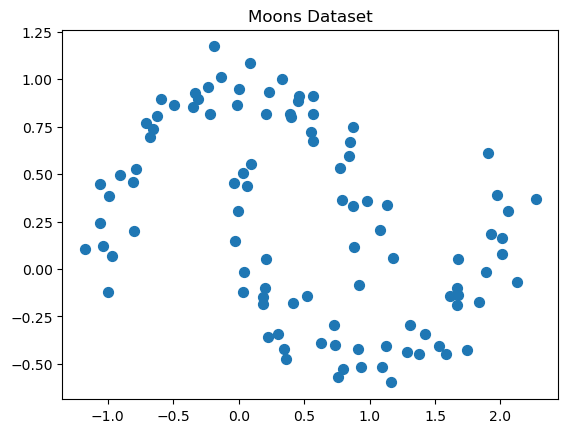

Converged after 4 iterations.


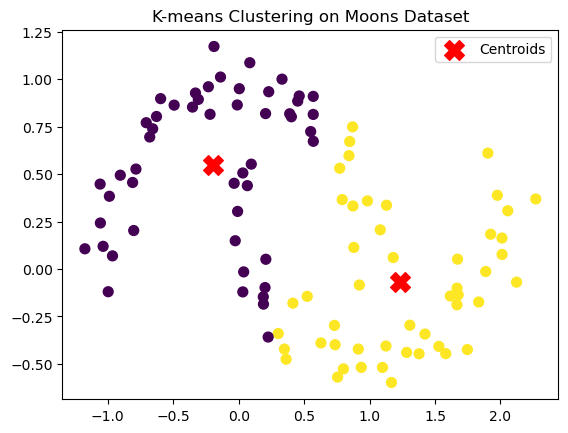

In [23]:
moons = pd.read_csv('moons.csv').to_numpy()
plt.scatter(moons[:, 0], moons[:, 1], s=50)
plt.title('Moons Dataset')
plt.show()

# Perform k-means clustering
k = 2
centroids = moons[np.random.choice(moons.shape[0], k, replace=False), :]
labels, centroids = k_means(moons, k, centroids)

# Visualize the k-means clustering results
plt.scatter(moons[:, 0], moons[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-means Clustering on Moons Dataset')
plt.legend()
plt.show()

K-means performed poorly because of the way it works. It's not a good choice because in this particular example centroids are bad criterion for assigning class labels. Hierarchical clustering with single linkage is a better way to deal with it.

## Hierarchical
Instead, we turn to hierarchical clustering.
Implement both single and complete linkage clustering, plot the results and argue which is better.

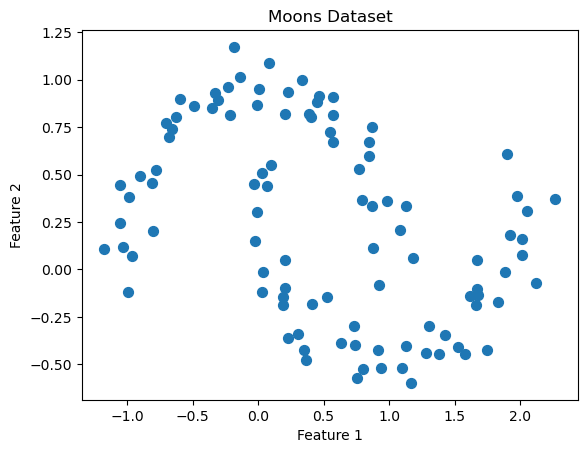

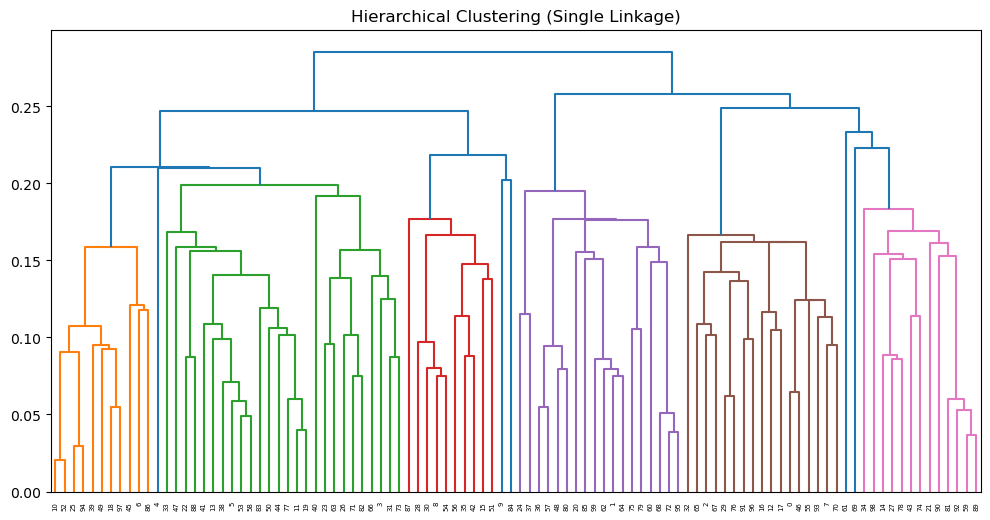

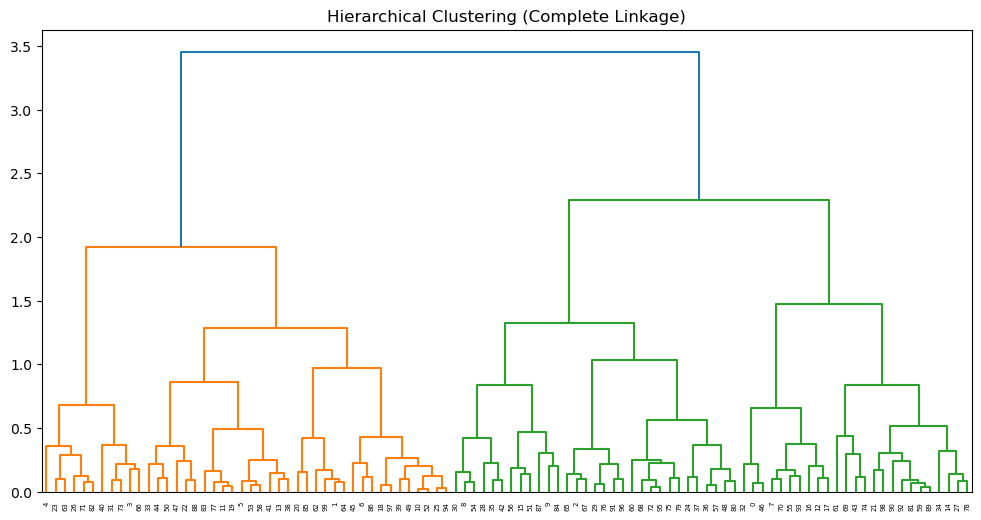

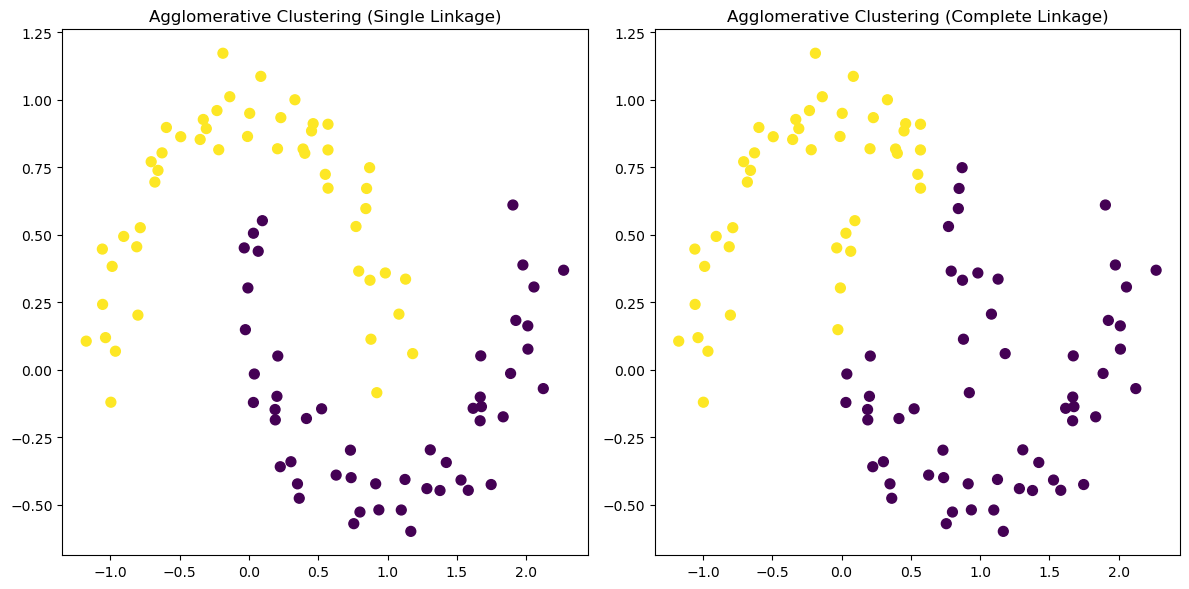

In [24]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the moons dataset
moons = pd.read_csv('moons.csv').to_numpy()

# Visualize the moons dataset
plt.scatter(moons[:, 0], moons[:, 1], s=50)
plt.title('Moons Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Hierarchical clustering using single linkage
single_linkage = linkage(moons, method='single')
plt.figure(figsize=(12, 6))
plt.title('Hierarchical Clustering (Single Linkage)')
dendrogram(single_linkage)
plt.show()

# Hierarchical clustering using complete linkage
complete_linkage = linkage(moons, method='complete')
plt.figure(figsize=(12, 6))
plt.title('Hierarchical Clustering (Complete Linkage)')
dendrogram(complete_linkage)
plt.show()

# Agglomerative clustering using scikit-learn (single linkage)
single_agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='single')
single_labels = single_agg_clustering.fit_predict(moons)

# Agglomerative clustering using scikit-learn (complete linkage)
complete_agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='complete')
complete_labels = complete_agg_clustering.fit_predict(moons)

# Visualize the results for both methods
plt.figure(figsize=(12, 6))

# Plot for single linkage
plt.subplot(1, 2, 1)
plt.scatter(moons[:, 0], moons[:, 1], c=single_labels, s=50, cmap='viridis')
plt.title('Agglomerative Clustering (Single Linkage)')

# Plot for complete linkage
plt.subplot(1, 2, 2)
plt.scatter(moons[:, 0], moons[:, 1], c=complete_labels, s=50, cmap='viridis')
plt.title('Agglomerative Clustering (Complete Linkage)')

plt.tight_layout()
plt.show()

Complete linkage focuses on furthest neighbor, while single linkage focuses on a nearest.
In the plotted results we see that single linkage was able to separate two classes correctly, while complete linkage failed.

## Task 2
You are provided a dataset of 8x8 gray value images.
Perform both PCA and t-SNE embeddings (perplexity=10) to embed the dataset into the two dimensional space and compare the resulting low-dimensional data.
Explain, why each respective method performs better/worse.

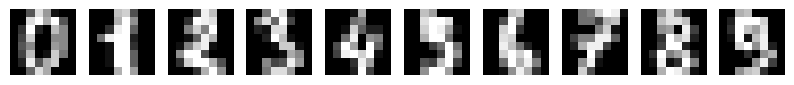

In [25]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()
X = digits.data
# plot sample images
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
plt.show()

In [26]:
# do PCA here
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [27]:
# do TSNE here
tsne = TSNE(n_components=2, perplexity=10, random_state=42)
X_tsne = tsne.fit_transform(X)

**Analyze the results here**

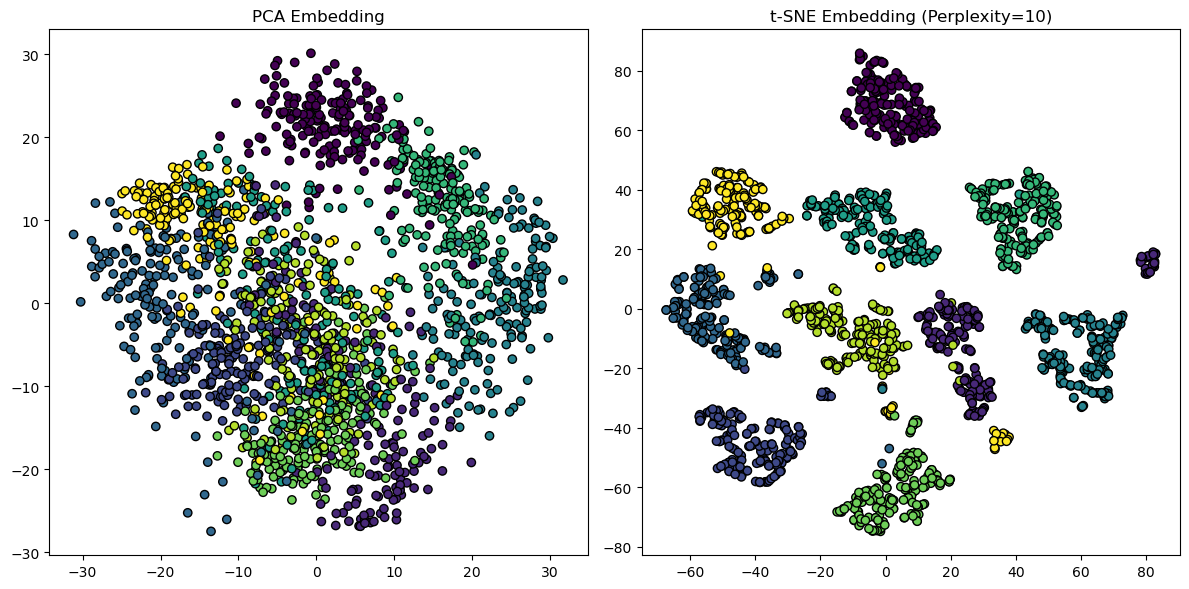

In [28]:
plt.figure(figsize=(12, 6))
# Plot PCA embeddings
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=digits.target, cmap='viridis', edgecolor='k')
plt.title('PCA Embedding')

# Plot t-SNE embeddings
plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=digits.target, cmap='viridis', edgecolor='k')
plt.title('t-SNE Embedding (Perplexity=10)')

plt.tight_layout()
plt.show()

We can clearly see that t-SNE produced more distinguishable classes (and their boundaries) on a 2-dimensional representation. This is due to t-SNE ability to visualize local patterns in complex structures.